# Import Libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px

# Reading dataset

In [2]:
df=pd.read_csv("yield_df.csv")
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


# Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [4]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [5]:
df.describe(include='object')

,Area,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


In [6]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [7]:
# remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
26293,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
26294,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
26295,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [8]:
## showing the count of Nans
print(df.isnull().sum())

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [9]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000
mean,2001.501464,75442.329277,1165.491577,39492.486263,20.990297
std,7.052085,82727.001265,712.540421,61396.180191,5.989020
min,1990.000000,50.000000,51.000000,0.040000,1.610000
25%,1995.000000,19730.000000,593.000000,2513.000000,17.280000
50%,2001.000000,37322.000000,1083.000000,24304.000000,21.960000
75%,2008.000000,101741.000000,1668.000000,51741.990000,26.090000
max,2013.000000,468991.000000,3240.000000,367778.000000,30.420000


In [10]:
df.describe(include='object')

,Area,Item
count,26297,26297
unique,71,10
top,India,Potatoes
freq,4048,3724


In [11]:
datacorr=df.copy()

<AxesSubplot:>

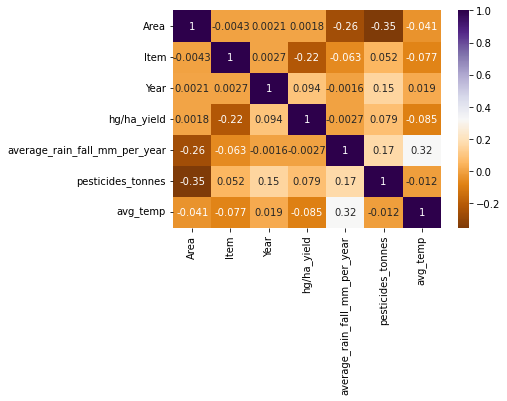

In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

In [13]:
datacorr

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,16500,89.0,1828.92,17.48
1,0,3,1990,78936,89.0,1828.92,17.48
2,0,4,1990,28000,89.0,1828.92,17.48
3,0,5,1990,16571,89.0,1828.92,17.48
4,0,8,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,70,4,2013,22581,657.0,2550.07,19.76
26293,70,5,2013,3066,657.0,2550.07,19.76
26294,70,6,2013,13142,657.0,2550.07,19.76
26295,70,7,2013,22222,657.0,2550.07,19.76


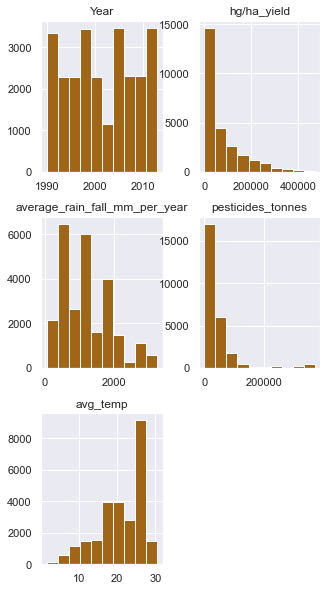

In [14]:
sns.set(palette='BrBG')
df.hist(figsize=(5,10));

<AxesSubplot:xlabel='Year'>

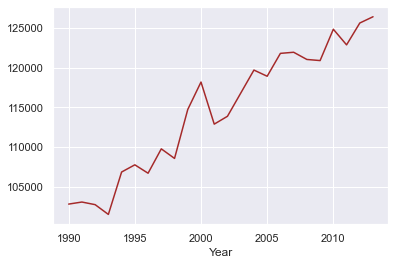

In [15]:
df2=df[df['Item']=='Yams']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')

<AxesSubplot:xlabel='Item', ylabel='hg/ha_yield'>

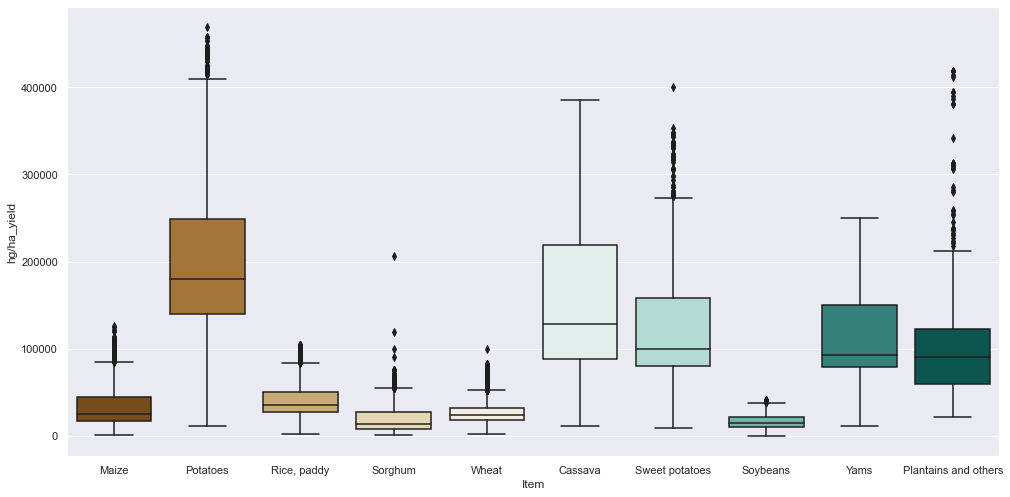

In [16]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=df,ax=ax)

In [17]:
# sns.scatterplot(x = 'Item', y = 'avg_temp', data = df,size=10,color='y')
# plt.xticks(rotation=90);

In [18]:
grouped = df.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]
    
    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]
    
    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

,Item,Area,hg/ha_yield
0,Cassava,India,385818
1,Maize,Tajikistan,125670
2,Plantains and others,Guatemala,418505
3,Potatoes,France,468991
4,"Rice, paddy",Australia,103895
5,Sorghum,Algeria,206000
6,Soybeans,Turkey,41609
7,Sweet potatoes,Senegal,400000
8,Wheat,Zambia,99387
9,Yams,Mali,250000


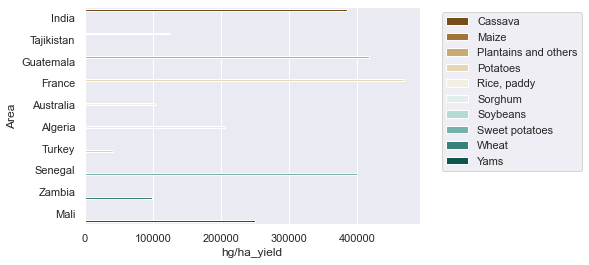

In [19]:
ax=sns.barplot(data=best_areas_df,x='hg/ha_yield',y='Area',hue='Item',palette="BrBG")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def change_of_years(data, template='seaborn'):
    col = data.columns[3:].tolist()
    for i in col:
        sns.lineplot(data=data, x='Year', y=i, color='green')
#         plt.title('Effect of Years on {i}')
        plt.show()
        yield plt


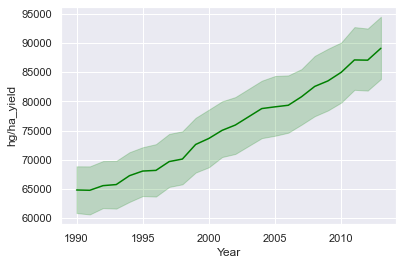

In [21]:
yplot = change_of_years(df)
next(yplot);

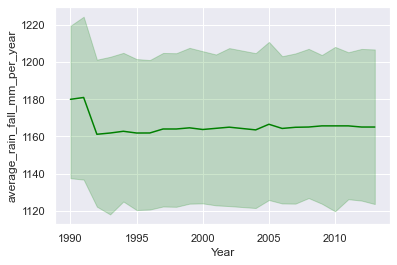

In [22]:
next(yplot);

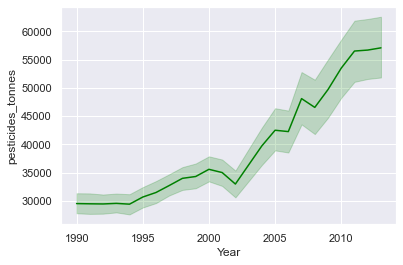

In [23]:
next(yplot);

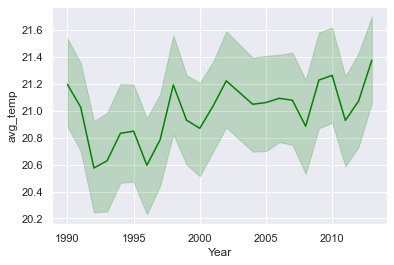

In [24]:
next(yplot);

# Building Models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The accuracy of the Linear Regression Model Train is 7.39
The accuracy of the  Linear Regression Model Test is 7.37


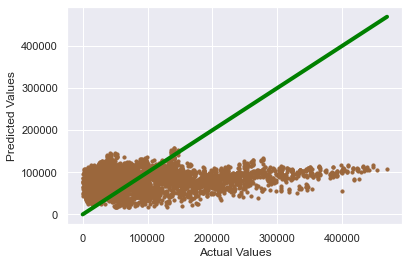

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 97.62


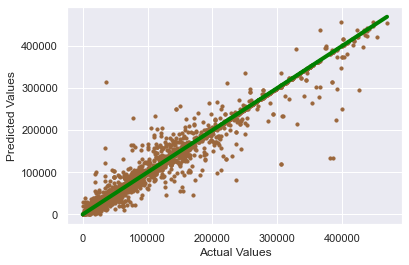

The accuracy of the Random Forest Model Train is 99.81
The accuracy of the  Random Forest Model Test is 98.58


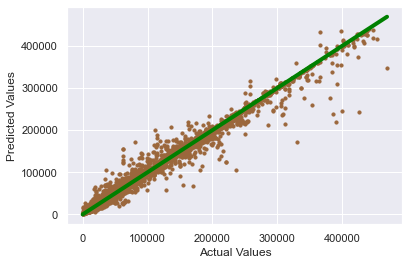

The accuracy of the Gradient Boost Model Train is 84.47
The accuracy of the  Gradient Boost Model Test is 83.11


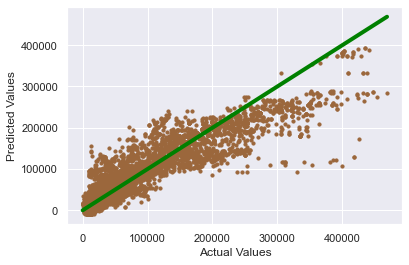

The accuracy of the XGBoost Model Train is 98.82
The accuracy of the  XGBoost Model Test is 97.43


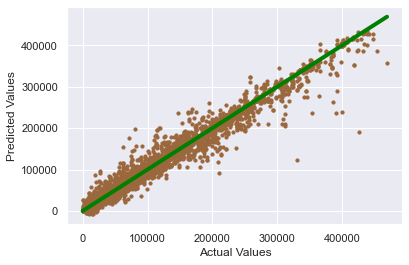

The accuracy of the KNN Model Train is 56.73
The accuracy of the  KNN Model Test is 28.90


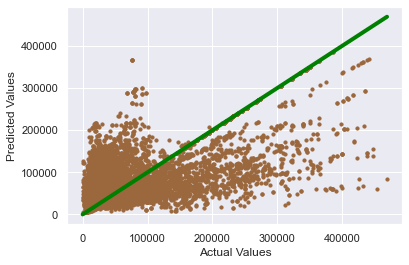

The accuracy of the Bagging Regressor Model Train is 99.81
The accuracy of the  Bagging Regressor Model Test is 98.59


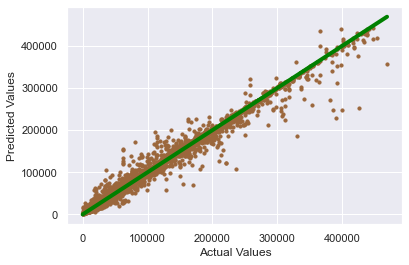

In [29]:
results = []
import math
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=1000,random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = math.sqrt(mean_squared_error(y_test, y_pred))
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

In [31]:
dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')
display(df_styled_best)

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.073724,79332.959921,0.073724
1,Decision Tree,0.976174,12723.613777,0.976174
2,Random Forest,0.985828,9812.822175,0.985828
3,Gradient Boost,0.831140,33872.492929,0.831140
4,XGBoost,0.974317,13210.005690,0.974317
5,KNN,0.289040,69503.430377,0.289040
6,Bagging Regressor,0.985881,9794.589505,0.985881


In [32]:
model=BaggingRegressor(n_estimators=150, random_state=42)
X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
name='Bagging Regressor'

The accuracy of the Bagging Regressor Model Train is 99.81
The accuracy of the Bagging Regressor Model Test is 98.59


Text(0, 0.5, 'Predicted Values')

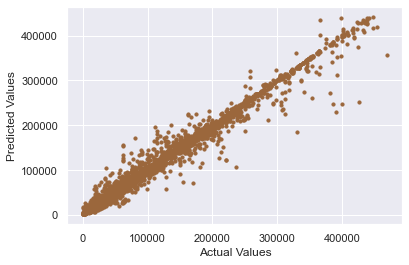

In [33]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
acc = (model.score(X_train , y_train)*100)
print(f'The accuracy of the {name} Model Train is {acc:.2f}')
acc =(model.score(X_test , y_test)*100)
print(f'The accuracy of the {name} Model Test is {acc:.2f}')    
plt.scatter(y_test, y_pred,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


In [34]:
model.predict([[0,1,1990,121.0,1485,16.17]])

array([18846.24666667])